In [1]:
%plot --format svg

In [2]:
setdefaults

## My question from last class 

![q1](efficient_soln.png)

![A](https://lh4.googleusercontent.com/fmG7EnFxpvvjSgijOuwz8osuiH3cBDgOzTE64KnfQeeDDSG2oE86-BzcpYIQMVkkAgRRGEDEGi6-Nkr8qmEMeaAk-gcjEmXe42WFYUdOa5XoUaBkXRakkA77_XrkRjArCGZIFhjjDRoO7x0)

![q2](norm_A.png)


## Your questions from last class

1. Do we have to submit a link for HW #4 somewhere or is uploading to Github sufficient?
    
    -no, your submission from HW 3 is sufficient

2. How do I get the formulas/formatting in markdown files to show up on github?
    
    -no luck for markdown equations in github, this is an ongoing request
    
3. Confused about the p=1 norm part and ||A||_1

4. When's the exam?
    
    -next week (3/9)

5. What do you recommend doing to get better at figuring out the homeworks?

    -time and experimenting (try going through the lecture examples, verify my work)
    
6. Could we have an hw or extra credit with a video lecture to learn some simple python?
    
    -Sounds great! how simple? 
    
    -[Installing Python and Jupyter Notebook (via Anaconda) - https://www.continuum.io/downloads](https://www.continuum.io/downloads)
    
    -[Running Matlab kernel in Jupyter - https://anneurai.net/2015/11/12/matlab-based-ipython-notebooks/](https://anneurai.net/2015/11/12/matlab-based-ipython-notebooks/)
    
    -[Running Octave kernel in Jupyter - https://anaconda.org/pypi/octave_kernel](https://anaconda.org/pypi/octave_kernel)
    
    

## Condition of a matrix 
### *just checked in to see what condition my condition was in*
### Matrix norms

The Euclidean norm of a vector is measure of the magnitude (in 3D this would be: $|x|=\sqrt{x_{1}^{2}+x_{2}^{2}+x_{3}^{2}}$) in general the equation is:

$||x||_{e}=\sqrt{\sum_{i=1}^{n}x_{i}^{2}}$

For a matrix, A, the same norm is called the Frobenius norm:

$||A||_{f}=\sqrt{\sum_{i=1}^{n}\sum_{i=1}^{m}A_{i,j}^{2}}$

In general we can calculate any $p$-norm where

$||A||_{p}=\sqrt{\sum_{i=1}^{n}\sum_{i=1}^{m}A_{i,j}^{p}}$

so the p=1, 1-norm is 

$||A||_{1}=\sqrt{\sum_{i=1}^{n}\sum_{i=1}^{m}A_{i,j}^{1}}=\sum_{i=1}^{n}\sum_{i=1}^{m}|A_{i,j}|$

$||A||_{\infty}=\sqrt{\sum_{i=1}^{n}\sum_{i=1}^{m}A_{i,j}^{\infty}}=\max_{1\le i \le n}\sum_{j=1}^{m}|A_{i,j}|$

### Condition of Matrix

The matrix condition is the product of 

$Cond(A) = ||A||\cdot||A^{-1}||$ 

So each norm will have a different condition number, but the limit is $Cond(A)\ge 1$

An estimate of the rounding error is based on the condition of A:

$\frac{||\Delta x||}{x} \le Cond(A) \frac{||\Delta A||}{||A||}$

So if the coefficients of A have accuracy to $10^{-t}

and the condition of A, $Cond(A)=10^{c}$

then the solution for x can have rounding errors up to $10^{c-t}$


In [72]:
A=[1,1/2,1/3;1/2,1/3,1/4;1/3,1/4,1/5]
[L,U]=LU_naive(A)

A =

   1.00000   0.50000   0.33333
   0.50000   0.33333   0.25000
   0.33333   0.25000   0.20000

L =

   1.00000   0.00000   0.00000
   0.50000   1.00000   0.00000
   0.33333   1.00000   1.00000

U =

   1.00000   0.50000   0.33333
   0.00000   0.08333   0.08333
   0.00000  -0.00000   0.00556



Then, $A^{-1}=(LU)^{-1}=U^{-1}L^{-1}$

$Ld_{1}=\left[\begin{array}{c}
1 \\
0 \\
0 \end{array}\right]$, $Ux_{1}=d_{1}$ ...

In [75]:
invA=zeros(3,3);
d1=L\[1;0;0];
d2=L\[0;1;0];
d3=L\[0;0;1];
invA(:,1)=U\d1;
invA(:,2)=U\d2;
invA(:,3)=U\d3
invA*A

invA =

     9.0000   -36.0000    30.0000
   -36.0000   192.0000  -180.0000
    30.0000  -180.0000   180.0000

ans =

   1.0000e+00   3.5527e-15   2.9976e-15
  -1.3249e-14   1.0000e+00  -9.1038e-15
   8.5117e-15   7.1054e-15   1.0000e+00



Find the condition of A, $cond(A)$

In [74]:
% Frobenius norm
normf_A = sqrt(sum(sum(A.^2)))
normf_invA = sqrt(sum(sum(invA.^2)))

cond_f_A = normf_A*normf_invA

norm(A,'fro')

% p=1, column sum norm
norm1_A = max(sum(A,2))
norm1_invA = max(sum(invA,2))
norm(A,1)

cond_1_A=norm1_A*norm1_invA

% p=inf, row sum norm
norminf_A = max(sum(A,1))
norminf_invA = max(sum(invA,1))
norm(A,inf)

cond_inf_A=norminf_A*norminf_invA


normf_A =  1.4136
normf_invA =  372.21
cond_f_A =  526.16
ans =  1.4136
norm1_A =  1.8333
norm1_invA =  30.000
ans =  1.8333
cond_1_A =  55.000
norminf_A =  1.8333
norminf_invA =  30.000
ans =  1.8333
cond_inf_A =  55.000


Consider the problem again from the intro to Linear Algebra, 4 masses are connected in series to 4 springs with spring constants $K_{i}$. What does a high condition number mean for this problem? 

![Springs-masses](../lecture_09/mass_springs.png)

The masses haves the following amounts, 1, 2, 3, and 4 kg for masses 1-4. Using a FBD for each mass:

$m_{1}g+k_{2}(x_{2}-x_{1})-k_{1}x_{1}=0$

$m_{2}g+k_{3}(x_{3}-x_{2})-k_{2}(x_{2}-x_{1})=0$

$m_{3}g+k_{4}(x_{4}-x_{3})-k_{3}(x_{3}-x_{2})=0$

$m_{4}g-k_{4}(x_{4}-x_{3})=0$

in matrix form:

$\left[ \begin{array}{cccc}
k_{1}+k_{2} & -k_{2} & 0 & 0 \\
-k_{2} & k_{2}+k_{3} & -k_{3} & 0 \\
0 & -k_{3} & k_{3}+k_{4} & -k_{4} \\
0 & 0 & -k_{4} & k_{4} \end{array} \right]
\left[ \begin{array}{c}
x_{1} \\
x_{2} \\
x_{3} \\
x_{4} \end{array} \right]=
\left[ \begin{array}{c}
m_{1}g \\
m_{2}g \\
m_{3}g \\
m_{4}g \end{array} \right]$

In [21]:
k1=10; % N/m
k2=100000;
k3=10;
k4=1;
m1=1; % kg
m2=2;
m3=3;
m4=4;
g=9.81; % m/s^2
K=[k1+k2 -k2 0 0; -k2 k2+k3 -k3 0; 0 -k3 k3+k4 -k4; 0 0 -k4 k4]
y=[m1*g;m2*g;m3*g;m4*g]

K =

   100010  -100000        0        0
  -100000   100010      -10        0
        0      -10       11       -1
        0        0       -1        1

y =

    9.8100
   19.6200
   29.4300
   39.2400



In [25]:
cond(K,inf)
cond(K,1)
cond(K,'fro')
cond(K,2)

ans =    3.2004e+05
ans =    3.2004e+05
ans =    2.5925e+05
ans =    2.5293e+05


In [26]:
e=eig(K)
max(e)/min(e)

e =

   7.9078e-01
   3.5881e+00
   1.7621e+01
   2.0001e+05

ans =    2.5293e+05


# Iterative Methods

## Gauss-Seidel method

If we have an intial guess for each value of a vector $x$ that we are trying to solve, then it is easy enough to solve for one component given the others. 

Take a 3$\times$3 matrix 

$Ax=b$

$\left[ \begin{array}{ccc}
3 & -0.1 & -0.2  \\
0.1 & 7 & -0.3  \\
0.3 & -0.2 & 10 \end{array} \right]
\left[ \begin{array}{c}
x_{1} \\
x_{2} \\
x_{3} \end{array} \right]=
\left[ \begin{array}{c}
7.85 \\
-19.3 \\
71.4\end{array} \right]$

$x_{1}=\frac{7.85+0.1x_{2}+0.3x_{3}}{3}$

$x_{2}=\frac{-19.3-0.1x_{1}+0.3x_{3}}{7}$

$x_{3}=\frac{71.4+0.1x_{1}+0.2x_{2}}{10}$

In [9]:
A=[3 -0.1 -0.2;0.1 7 -0.3;0.3 -0.2 10]
b=[7.85;-19.3;71.4]

x=A\b

A =

    3.00000   -0.10000   -0.20000
    0.10000    7.00000   -0.30000
    0.30000   -0.20000   10.00000

b =

    7.8500
  -19.3000
   71.4000

x =

   3.0000
  -2.5000
   7.0000



### Gauss-Seidel Iterative approach

As a first guess, we can use $x_{1}=x_{2}=x_{3}=0$

$x_{1}=\frac{7.85+0.1(0)+0.3(0)}{3}=2.6167$

$x_{2}=\frac{-19.3-0.1(2.6167)+0.3(0)}{7}=-2.7945$

$x_{3}=\frac{71.4+0.1(2.6167)+0.2(-2.7945)}{10}=7.0056$

Then, we update the guess:

$x_{1}=\frac{7.85+0.1(-2.7945)+0.3(7.0056)}{3}=2.9906$

$x_{2}=\frac{-19.3-0.1(2.9906)+0.3(7.0056)}{7}=-2.4996$

$x_{3}=\frac{71.4+0.1(2.9906)+0.2(-2.4966)}{10}=7.00029$

The results are conveerging to the solution we found with `\` of $x_{1}=3,~x_{2}=-2.5,~x_{3}=7$

We could also use an iterative method that solves for all of the x-components in one step:

### Jacobi method

$x_{1}^{i}=\frac{7.85+0.1x_{2}^{i-1}+0.3x_{3}^{i-1}}{3}$

$x_{2}^{i}=\frac{-19.3-0.1x_{1}^{i-1}+0.3x_{3}^{i-1}}{7}$

$x_{3}^{i}=\frac{71.4+0.1x_{1}^{i-1}+0.2x_{2}^{i-1}}{10}$

Here the solution is a matrix multiplication and vector addition

$\left[ \begin{array}{c}
x_{1}^{i} \\
x_{2}^{i} \\
x_{3}^{i} \end{array} \right]=
\left[ \begin{array}{c}
7.85/3 \\
-19.3/7 \\
71.4/10\end{array} \right]-
\left[ \begin{array}{ccc}
0 & -0.1 & -0.2  \\
0.1 & 0 & -0.3  \\
0.3 & -0.2 & 0 \end{array} \right]
\left[ \begin{array}{c}
x_{1}^{i-1} \\
x_{2}^{i-1} \\
x_{3}^{i-1} \end{array} \right]$

|x_{j}|Jacobi method |vs| Gauss-Seidel |
|--------|------------------------------|---|-------------------------------|
|$x_{1}^{i}=$ | $\frac{7.85+0.1x_{2}^{i-1}+0.3x_{3}^{i-1}}{3}$ | | $\frac{7.85+0.1x_{2}^{i-1}+0.3x_{3}^{i-1}}{3}$|
|$x_{2}^{i}=$ | $\frac{-19.3-0.1x_{1}^{i-1}+0.3x_{3}^{i-1}}{7}$ | | $\frac{-19.3-0.1x_{1}^{i}+0.3x_{3}^{i-1}}{7}$ |
|$x_{3}^{i}=$ | $\frac{71.4+0.1x_{1}^{i-1}+0.2x_{2}^{i-1}}{10}$ | | $\frac{71.4+0.1x_{1}^{i}+0.2x_{2}^{i}}{10}$|

In [15]:
ba=b./diag(A) % or ba=b./[A(1,1);A(2,2);A(3,3)]
sA=A-diag(diag(A)) % A with zeros on diagonal
sA(1,:)=sA(1,:)/A(1,1);
sA(2,:)=sA(2,:)/A(2,2);
sA(3,:)=sA(3,:)/A(3,3)
x0=[0;0;0];
x1=ba-sA*x0
x2=ba-sA*x1
x3=ba-sA*x2
fprintf('solution is converging to [3,-2.5,7]]\n')

ba =

   2.6167
  -2.7571
   7.1400

sA =

   0.00000  -0.10000  -0.20000
   0.10000   0.00000  -0.30000
   0.30000  -0.20000   0.00000

sA =

   0.000000  -0.033333  -0.066667
   0.014286   0.000000  -0.042857
   0.030000  -0.020000   0.000000

x1 =

   2.6167
  -2.7571
   7.1400

x2 =

   3.0008
  -2.4885
   7.0064

x3 =

   3.0008
  -2.4997
   7.0002

solution is converging to [3,-2.5,7]]


In [16]:
diag(A)
diag(diag(A))

ans =

    3
    7
   10

ans =

Diagonal Matrix

    3    0    0
    0    7    0
    0    0   10



This method works if problem is diagonally dominant, 

$|a_{ii}|>\sum_{j=1,j\ne i}^{n}|a_{ij}|$

If this condition is true, then Jacobi or Gauss-Seidel should converge



In [17]:
A=[0.1,1,3;1,0.2,3;5,2,0.3]
b=[12;2;4]
A\b

A =

   0.10000   1.00000   3.00000
   1.00000   0.20000   3.00000
   5.00000   2.00000   0.30000

b =

   12
    2
    4

ans =

  -2.9393
   9.1933
   1.0336



In [20]:
ba=b./diag(A) % or ba=b./[A(1,1);A(2,2);A(3,3)]
sA=A-diag(diag(A)) % A with zeros on diagonal
sA(1,:)=sA(1,:)/A(1,1);
sA(2,:)=sA(2,:)/A(2,2);
sA(3,:)=sA(3,:)/A(3,3)
x0=[0;0;0];
x1=ba-sA*x0
x2=ba-sA*x1
x3=ba-sA*x2
fprintf('solution is not converging to [-2.93,9.19,1.03]\n')

ba =

   120.000
    10.000
    13.333

sA =

   0   1   3
   1   0   3
   5   2   0

sA =

    0.00000   10.00000   30.00000
    5.00000    0.00000   15.00000
   16.66667    6.66667    0.00000

x1 =

   120.000
    10.000
    13.333

x2 =

   -380.00
   -790.00
  -2053.33

x3 =

   6.9620e+04
   3.2710e+04
   1.1613e+04

solution is not converging to [-2.93,9.19,1.03]


## Gauss-Seidel with Relaxation

In order to force the solution to converge faster, we can introduce a relaxation term $\lambda$. 

where the new x values are weighted between the old and new:

$x^{i}=\lambda x^{i}+(1-\lambda)x^{i-1}$

after solving for x, lambda weights the current approximation with the previous approximation for the updated x


A =

    3.00000   -0.10000   -0.20000
    0.10000    7.00000   -0.30000
    0.30000   -0.20000   10.00000

b =

    7.8500
  -19.3000
   71.4000



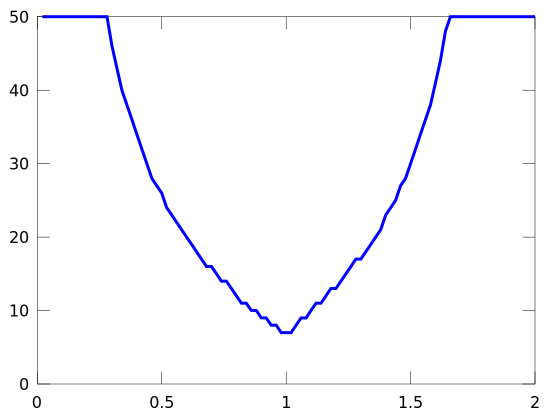

In [105]:
% rearrange A and b
A=[3 -0.1 -0.2;0.1 7 -0.3;0.3 -0.2 10]
b=[7.85;-19.3;71.4]

iters=zeros(100,1);
for i=1:100
    lambda=2/100*i;
    [x,ea,iters(i)]=Jacobi_rel(A,b,lambda);
end
plot([1:100]*2/100,iters)    

In [107]:
l=fminbnd(@(l) lambda_fcn(A,b,l),0.5,1.5)

l =  0.99158


In [108]:
A\b

ans =

   3.0000
  -2.5000
   7.0000



In [109]:
[x,ea,iter]=Jacobi_rel(A,b,l,0.000001)
[x,ea,iter]=Jacobi_rel(A,b,1,0.000001)


x =

   3.0000
  -2.5000
   7.0000

ea =

   1.8289e-07
   2.1984e-08
   2.3864e-08

iter =  8
x =

   3.0000
  -2.5000
   7.0000

ea =

   1.9130e-08
   7.6449e-08
   3.3378e-08

iter =  8


## Nonlinear Systems

Consider two simultaneous nonlinear equations with two unknowns:

$x_{1}^{2}+x_{1}x_{2}=10$

$x_{2}+3x_{1}x_{2}^{2}=57$

Graphically, we are looking for the solution:


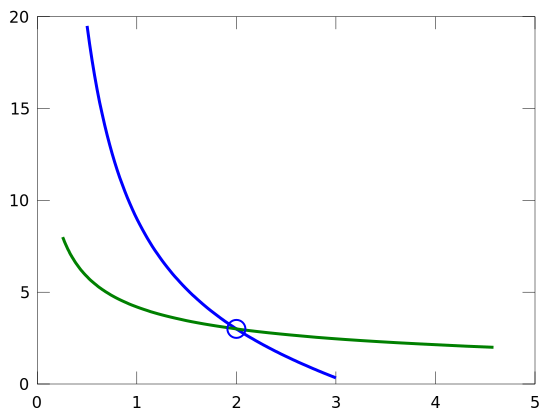

In [121]:
x11=linspace(0.5,3);
x12=(10-x11.^2)./x11;

x22=linspace(2,8);
x21=(57-x22).*x22.^-2/3;

plot(x11,x12,x21,x22)
% Solution at x_1=2, x_2=3
hold on;
plot(2,3,'o')

## Newton-Raphson part II

Remember the first order approximation for the next point in a function is:

$f(x_{i+1})=f(x_{i})+(x_{i+1}-x_{i})f'(x_{i})$

then, $f(x_{i+1})=0$ so we are left with:

$x_{i+1}=x_{i}-\frac{f(x_{i})}{f'(x_{i})}$

We can use the same formula, but now we have multiple dimensions so we need to determine the Jacobian

$[J]=\left[ \begin{array}{cccc}
\frac{\partial f_{1,i}}{\partial x_{1}} & \frac{\partial f_{1,i}}{\partial x_{2}} & 
\cdots & \frac{\partial f_{1,i}}{\partial x_{n}}  \\
\frac{\partial f_{2,i}}{\partial x_{1}} & \frac{\partial f_{2,i}}{\partial x_{2}} & 
\cdots & \frac{\partial f_{2,i}}{\partial x_{n}}  \\
\vdots & \vdots & & \vdots \\
\frac{\partial f_{n,i}}{\partial x_{1}} & \frac{\partial f_{n,i}}{\partial x_{2}} & 
\cdots & \frac{\partial f_{n,i}}{\partial x_{n}}  \\
\end{array} \right]$

$\left[ \begin{array}{c}
f_{1,i+1} \\
f_{2,i+1} \\
\vdots \\
f_{n,i+1}\end{array} \right]=
\left[ \begin{array}{c}
f_{1,i} \\
f_{2,i} \\
\vdots \\
f_{n,i}\end{array} \right]+
\left[ \begin{array}{cccc}
\frac{\partial f_{1,i}}{\partial x_{1}} & \frac{\partial f_{1,i}}{\partial x_{2}} & 
\cdots & \frac{\partial f_{1,i}}{\partial x_{n}}  \\
\frac{\partial f_{2,i}}{\partial x_{1}} & \frac{\partial f_{2,i}}{\partial x_{2}} & 
\cdots & \frac{\partial f_{2,i}}{\partial x_{n}}  \\
\vdots & \vdots & & \vdots \\
\frac{\partial f_{n,i}}{\partial x_{1}} & \frac{\partial f_{n,i}}{\partial x_{2}} & 
\cdots & \frac{\partial f_{n,i}}{\partial x_{n}}  \\
\end{array} \right]
\left( \left[ \begin{array}{c}
x_{i+1} \\
x_{i+1} \\
\vdots \\
x_{i+1}\end{array} \right]-
\left[ \begin{array}{c}
f_{1,i} \\
f_{2,i} \\
\vdots \\
f_{n,i}\end{array} \right]\right)$

### Solution is again in the form Ax=b

$[J]([x_{i+1}]-[x_{i}])=-[f]$

so

$[x_{i+1}]= [x_{i}]-[J]^{-1}[f]$

## Example of Jacobian calculation

### Nonlinear springs supporting two masses in series

Two springs are connected to two masses, with $m_1$=1 kg and $m_{2}$=2 kg. The springs are identical, but they have nonlinear spring constants, of $k_1$=10 N/m and $k_2$=-4 N/m

We want to solve for the final position of the masses ($x_1$ and $x_2$)

$m_{1}g+k_{1}(x_{2}-x_{1})+k_{2}(x_{2}-x_{1})^{2}+k_{1}x_{1}+k_{2}x_{1}^{2}=0$

$m_{2}g-k_{1}(x_{2}-x_{1})-k_{2}(x_2-x_1)^{2}=0$

$J(1,1)=\frac{\partial f_{1}}{\partial x_{1}}=-k_{1}-2k_{2}(x_{2}-x_{1})+k_{1}+2k_{2}x_{1}$

$J(1,2)=\frac{\partial f_1}{\partial x_{2}}=k_{1}+2k_{2}(x_{2}-x_{1})$

$J(2,1)=\frac{\partial f_2}{\partial x_{1}}=k_{1}+2k_{2}(x_{2}-x_{1})$

$J(2,2)=\frac{\partial f_2}{\partial x_{2}}=-k_{1}-2k_{2}(x_{2}-x_{1})$

Use an initial guess of $x_1=x_2=0$


In [ ]:
m1=1; % kg 
m2=2; % kg
k1=10; % N/m
k2=-4; % N/m^2

In [214]:
function [f,J]=mass_spring(x)
    % Function to calculate function values f1 and f2 as well as Jacobian 
    % for 2 masses and 2 identical nonlinear springs
    m1=1; % kg 
    m2=2; % kg
    k1=100; % N/m
    k2=-10; % N/m^2
    g=9.81; % m/s^2
    x1=x(1);
    x2=x(2);
    J=[-k1-2*k2*(x2-x1)-k1-2*k2*x1,k1+2*k2*(x2-x1);
        k1+2*k2*(x2-x1),-k1-2*k2*(x2-x1)];
    f=[m1*g+k1*(x2-x1)+k2*(x2-x1).^2-k1*x1-k2*x1^2;
       m2*g-k1*(x2-x1)-k2*(x2-x1).^2];
end
    

In [217]:
[f,J]=mass_spring([1,0])

f =

  -190.19
   129.62

J =

  -200   120
   120  -120



In [227]:
x0=[3;2];
[f0,J0]=mass_spring(x0);
x1=x0-J0\f0
ea=(x1-x0)./x1
[f1,J1]=mass_spring(x1);
x2=x1-J1\f1
ea=(x2-x1)./x2
[f2,J2]=mass_spring(x2);
x3=x2-J2\f2
ea=(x3-x2)./x3
x=x3
for i=1:3
    xold=x;
    [f,J]=mass_spring(x);
    x=x-J\f;
    ea=(x-xold)./x
end

x1 =

  -1.5142
  -1.4341

ea =

   2.9812
   2.3946

x2 =

   0.049894
   0.248638

ea =

   31.3492
    6.7678

x3 =

   0.29701
   0.49722

ea =

   0.83201
   0.49995

x =

   0.29701
   0.49722

ea =

   0.021392
   0.012890

ea =

   1.4786e-05
   8.9091e-06

ea =

   7.0642e-12
   4.2565e-12



In [228]:
x
X0=fsolve(@(x) mass_spring(x),[3;5])

x =

   0.30351
   0.50372

X0 =

   0.30351
   0.50372



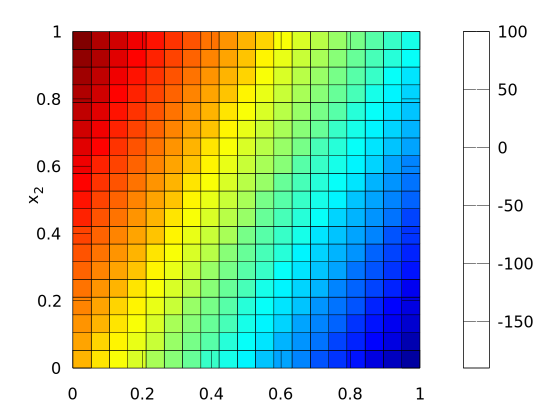

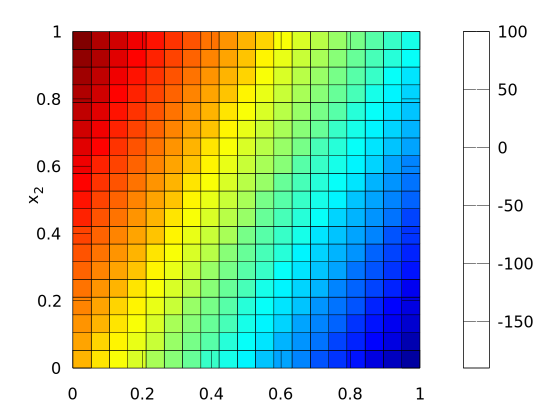

In [236]:
[X,Y]=meshgrid(linspace(0,1,20),linspace(0,1,20));
[N,M]=size(X);
F=zeros(size(X));
for i=1:N
    for j=1:M
        [f,~]=mass_spring([X(i,j),Y(i,j)]);
        F(i,j)=f(1);
    end
end
pcolor(X,Y,F)
xlabel('x_1')
ylabel('x_2')
colorbar()
figure()
pcolor(X,Y,F)
xlabel('x_1')
ylabel('x_2')
colorbar()